# Explore the data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
features = pd.read_csv('features.csv') 
departments = pd.read_csv('Departments.csv', sep=';')
stores = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')


### Distribution of markdowns

The markdown histograms, characterized by irregularities and missing data, do not reveal clear pricing patterns. The lack of consistency across markdowns can pose challenges for sales forecasting. However, by cleaning the data and addressing missing values, the data quality can be enhanced.

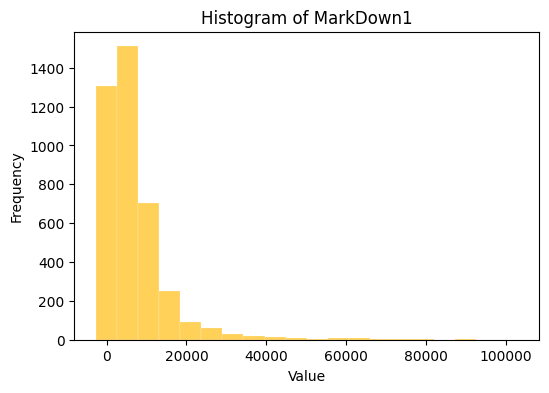

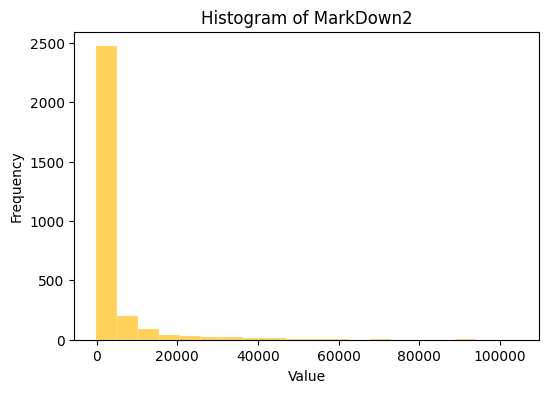

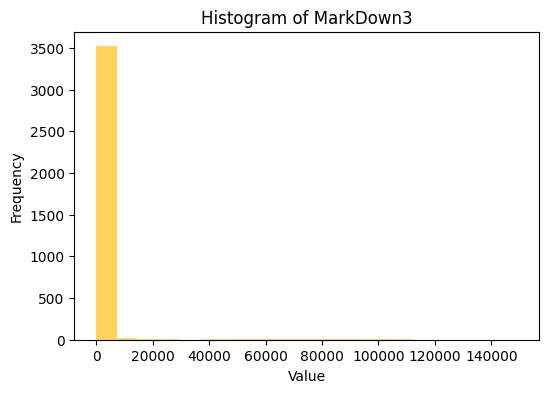

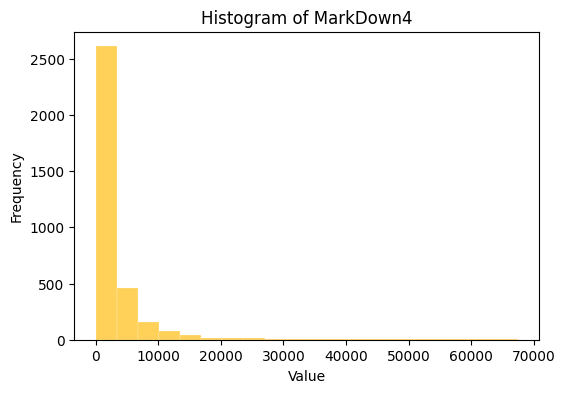

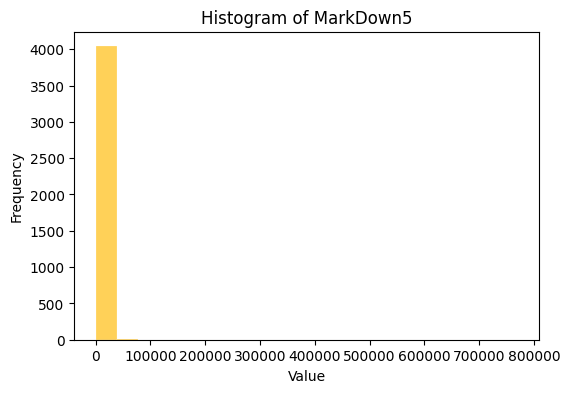

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

markdown_columns = features[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']]

for column in markdown_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(features[column].dropna(), bins=20, edgecolor='white', color='#ffc220', linewidth=0.15)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


### Distribution of indicators

The distribution graphs for unemployment rate, fuel prices, temperature, and CPI all exhibit characteristics of a normal distribution. The bell shaped curves suggest that the variables are relatively normally distributed within the dataset. However, there is a gap of missing data for CPI, hence the gap in the histogram.

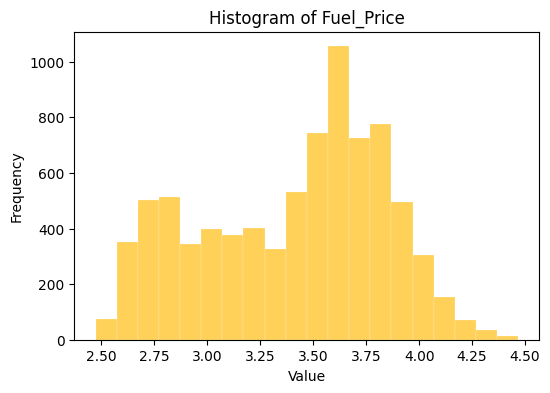

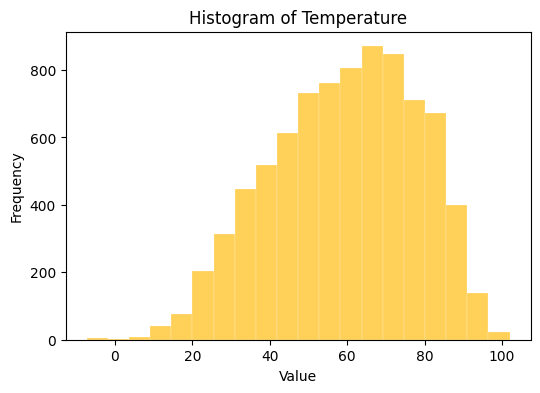

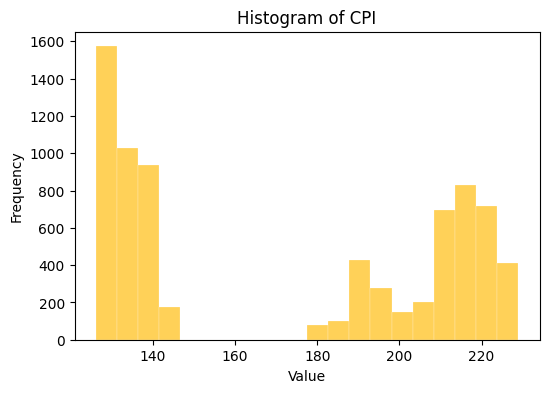

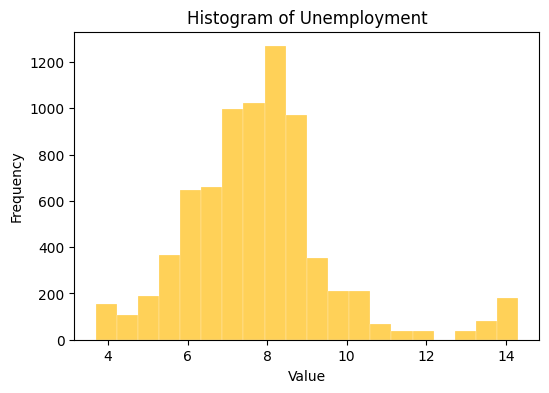

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

indicator_columns = features[['Fuel_Price', 'Temperature', 'CPI', 'Unemployment']]

for column in indicator_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(features[column].dropna(), bins=20, edgecolor='white', color='#ffc220', linewidth=0.15)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


### Weekly sales distribution by departments

Three key departments - Dry groceries (92), DSD Grocery, Snacks, and Beverages (95),  and prescription pharmacy (38) - have consistently demonstrated strong sales performance, with dry groceries leading. These insights are vital in refining sales prediction models to enhance overall forecasting accuracy.

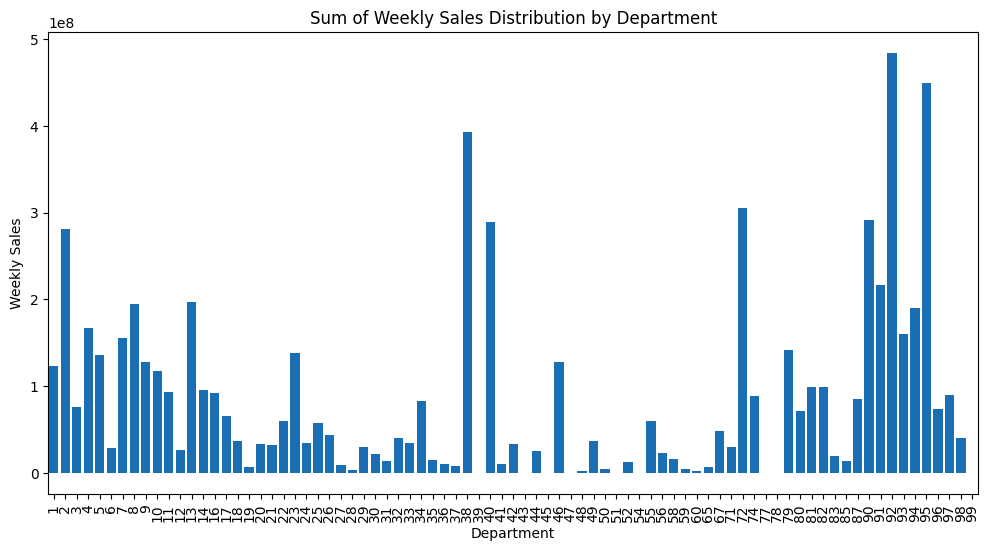

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sorted_data = train.sort_values(by='Weekly_Sales', ascending= False)

plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_data, x='Dept', y='Weekly_Sales', estimator = sum, errorbar=None, color='#0071CE')
plt.title('Sum of Weekly Sales Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=90)  # Rotating x-axis labels for readability

plt.show()


### Distribution of weekly sales by store

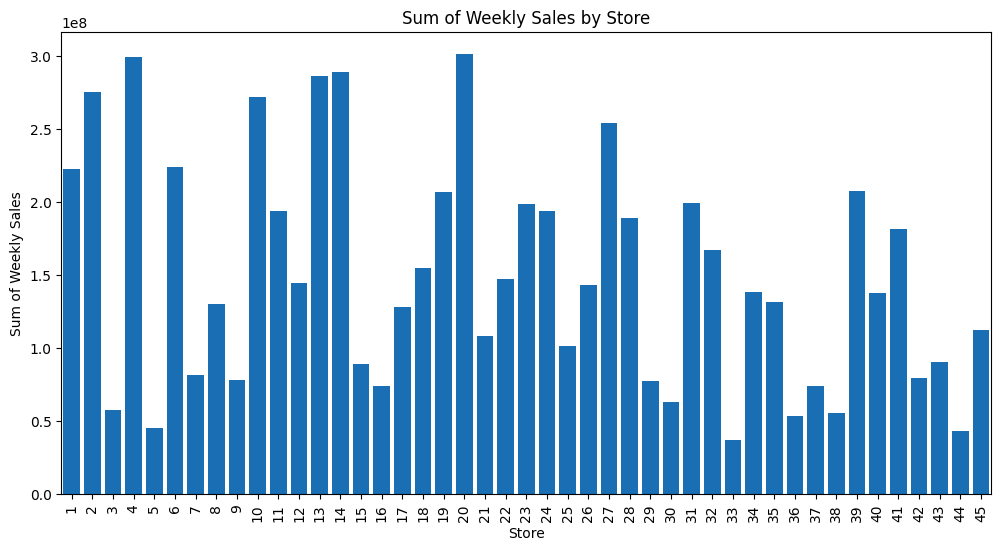

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=train, x='Store', y='Weekly_Sales', estimator=sum, errorbar=None, color='#0071CE')
plt.title('Sum of Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Sum of Weekly Sales')
plt.xticks(rotation=90)  # Rotating x-axis labels for readability
plt.show()


### Distribution of weekly sales by year.

This chart presents the sum of weekly sales for each year (2010, 2011, 2012), indicating an upward trend in sales over the three-year period. However, it is important to note that in 2012, the sum of weekly sales appears lower due to missing data from train.csv, which only covers sales up until October 26th, leaving out two months' worth of sales data.

KeyboardInterrupt: 

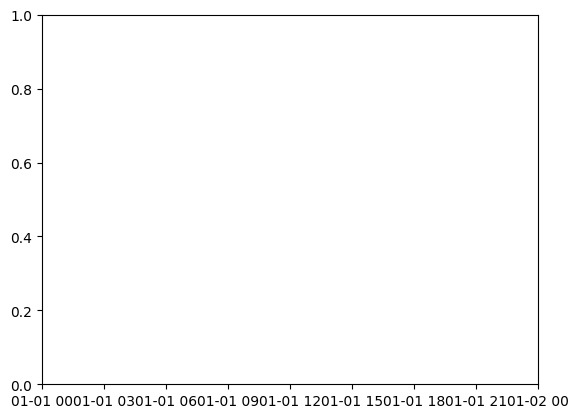

In [ ]:
train['Date'] = pd.to_datetime(train['Date'])
train = train.sort_values(by='Date')
plt.bar(train['Date'],train['Weekly_Sales'])
plt.xticks(rotation=90)
plt.show

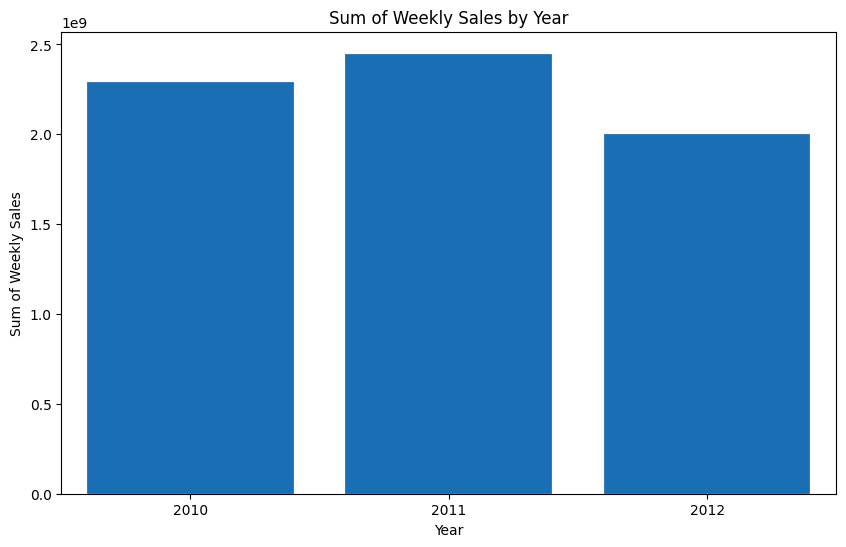

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month

plt.figure(figsize=(10, 6))
sns.barplot(data=train, x='Year', y='Weekly_Sales', estimator=sum, errorbar=None, edgecolor='white', color='#0071CE', linewidth=0.15)
plt.title('Sum of Weekly Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sum of Weekly Sales')
plt.xticks(rotation=0)  # Removing x-axis rotation for readability
plt.show()


### Distribution of stores by type.

This bar plot represents the sum of stores categorized by type. Type A is significantly the highest with the most stores, followed by type B and lastly type C.

<AxesSubplot: xlabel='Type', ylabel='Store'>

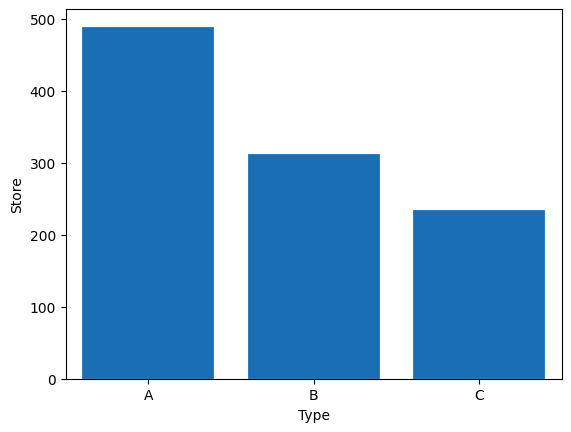

In [ ]:
sns.barplot(data=stores, x='Type', y='Store', estimator=sum, errorbar=None, edgecolor='white', color='#0071CE', linewidth=0.15)

### CPI change over the years, store size and store types, and weekly sales by year, month, quarter and day.

As can be seen from the first graph, store type A exhibits the largest size between the three types of stores, and type Cbeing the smallest. 

The bar plot 'Weekly Sales by year, month, quarter and day shows that November is the busiest month of the year. Weekly sales usually average around 4.1 billion, however, in November 2010, it reached a high of 5.8 billion and in November 2011 it reached 6.1 billion.

<img src="image-20231108-154337.png" width="" align="" />

### Exploring Data with Statistics: Identifying Key Variables for Stores, Features and Train.

Train description: This section provides essential statistics for weekly sales, offering insights into department-specific sales performance

In [ ]:
train.describe()

,Store,Dept,Weekly_Sales,Year,Month
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,2010.968591,6.449510
std,12.785297,30.492054,22711.183519,0.796876,3.243217
min,1.000000,1.000000,-4988.940000,2010.000000,1.000000
25%,11.000000,18.000000,2079.650000,2010.000000,4.000000
50%,22.000000,37.000000,7612.030000,2011.000000,6.000000
75%,33.000000,74.000000,20205.852500,2012.000000,9.000000
max,45.000000,99.000000,693099.360000,2012.000000,12.000000


Feature description: This table presents key statistics for various sales-affecting features, like CPI, Fuel Price, and Markdowns

In [ ]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


Store description: This section provides a concise overview of key store attributes, including size and department count.

In [ ]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=755e957e-1a32-4030-9372-201dbf660aae' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>